# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 567


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try: 

        # Parse the JSON and retrieve data
        city_weather = response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
    

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ancud
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | holualoa
Processing Record 5 of Set 1 | bullhead city
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | utrik
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | elgin
Processing Record 11 of Set 1 | tsiombe
Processing Record 12 of Set 1 | chonchi
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | fort bragg
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | miyaly
Processing Record 17 of Set 1 | tura
Processing Record 18 of Set 1 | kruisfontein
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | rundu
Processing Record 21 of Set 1 | mejit
Processing Record 22 of Set 1 | banda aceh
Processing Record 23 of Set 1

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          541
Lat           541
Lng           541
Max Temp      541
Humidity      541
Cloudiness    541
Wind Speed    541
Country       541
Date          541
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ancud,-41.8697,-73.8203,18.25,58,73,3.99,CL,1707410710
1,ushuaia,-54.8000,-68.3000,9.81,62,75,1.54,AR,1707410477
2,adamstown,-25.0660,-130.1015,23.84,90,100,12.24,PN,1707410710
3,holualoa,19.6228,-155.9522,20.91,80,100,2.57,US,1707410532
4,bullhead city,35.1478,-114.5683,8.16,83,75,0.00,US,1707410710


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ancud,-41.8697,-73.8203,18.25,58,73,3.99,CL,1707410710
1,ushuaia,-54.8000,-68.3000,9.81,62,75,1.54,AR,1707410477
2,adamstown,-25.0660,-130.1015,23.84,90,100,12.24,PN,1707410710
3,holualoa,19.6228,-155.9522,20.91,80,100,2.57,US,1707410532
4,bullhead city,35.1478,-114.5683,8.16,83,75,0.00,US,1707410710


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

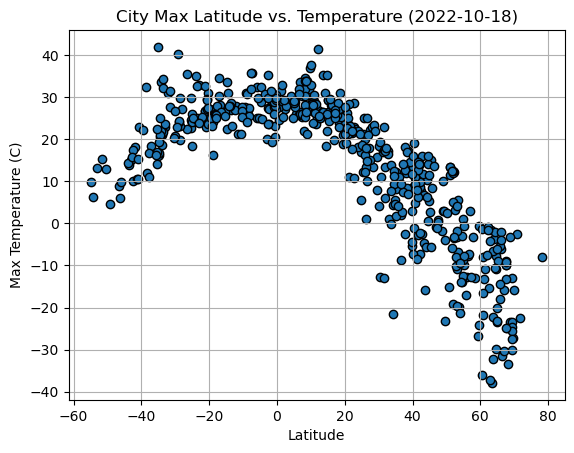

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker ="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

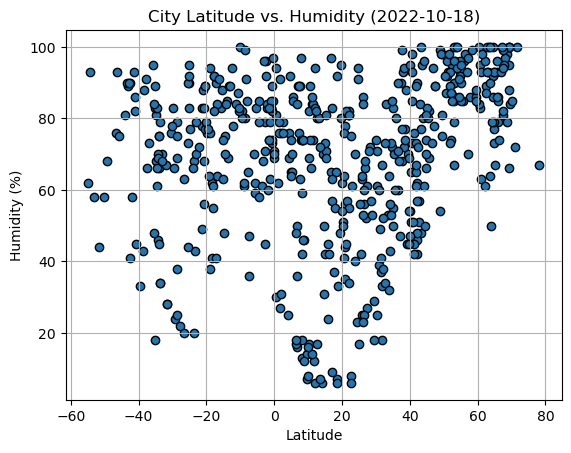

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

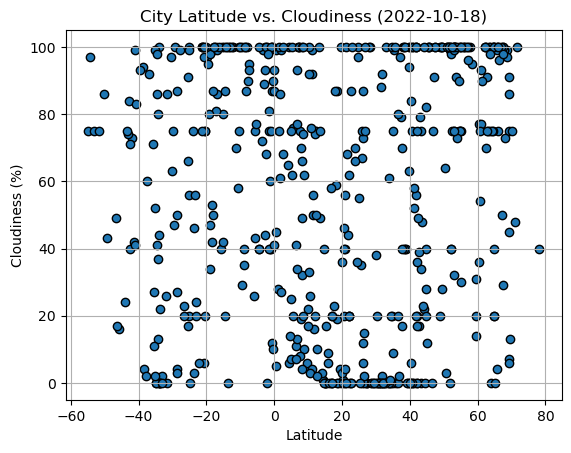

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

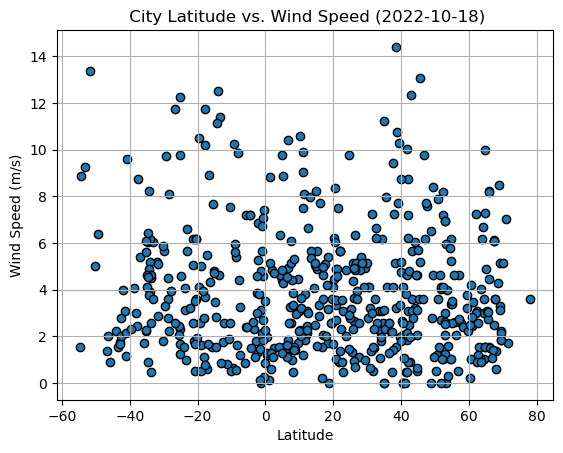

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(" City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_reg(x_axis, y_axis,eq_loc):  
    correlation = st.pearsonr(x_axis,y_axis)
    p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
    p_fit = p_slope * x_axis + p_int
    eq= f"y ={p_slope: .2f}x +{ p_int: .2f}"
       
    #Plot the line
    plt.scatter(x_axis, y_axis ,marker="o")
    plt.plot(x_axis,p_fit,linestyle="solid", color="red")
    plt.annotate(eq, eq_loc, fontsize=15, color="red")
    print(f"The r-value between {x_axis.name} and {y_axis.name} is {correlation[0]}")
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,holualoa,19.6228,-155.9522,20.91,80,100,2.57,US,1707410532
4,bullhead city,35.1478,-114.5683,8.16,83,75,0.00,US,1707410710
5,longyearbyen,78.2186,15.6401,-8.09,67,40,3.60,SJ,1707410710
6,utrik,11.2278,169.8474,26.47,84,99,9.88,MH,1707410711
8,yellowknife,62.4560,-114.3525,-15.33,89,100,3.09,CA,1707410712


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ancud,-41.8697,-73.8203,18.25,58,73,3.99,CL,1707410710
1,ushuaia,-54.8000,-68.3000,9.81,62,75,1.54,AR,1707410477
2,adamstown,-25.0660,-130.1015,23.84,90,100,12.24,PN,1707410710
7,blackmans bay,-43.0167,147.3167,15.07,89,74,1.77,AU,1707410711
10,tsiombe,-25.3000,45.4833,24.57,90,91,2.29,MG,1707410712


###  Temperature vs. Latitude Linear Regression Plot

The r-value between Lat and Max Temp is -0.8868509683007314


Text(0, 0.5, 'Max Temp')

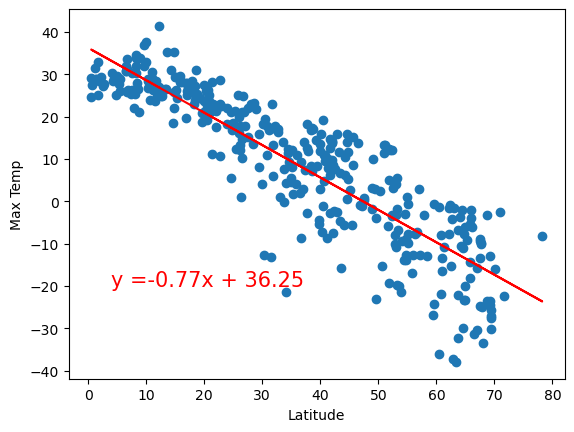

In [15]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],(4, -20))
plt.xlabel("Latitude")
plt.ylabel("Max Temp")




The r-value between Lat and Max Temp is 0.6131082483893302


Text(0, 0.5, 'Max Temp')

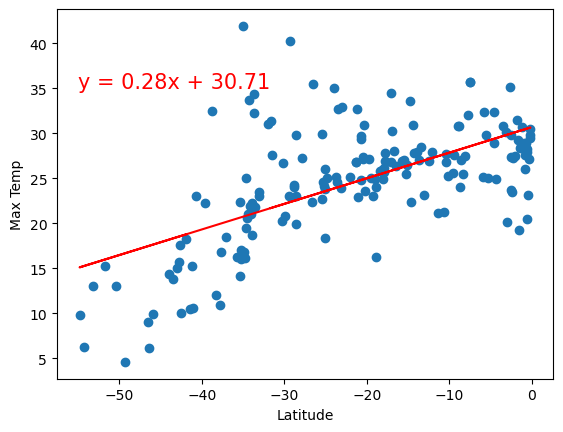

In [16]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],(-55, 35))
plt.xlabel("Latitude")
plt.ylabel("Max Temp")


**Discussion about the linear relationship:** YOUR RESPONSE HERE
The nothern hemisphere plot shows that the higher the latitude of the city the lower the temperature is. It has a strong negative correlation of -0.88.
The southern hemisphere plot shows that the higher the latitude of the city the higher the temperure is. It has a moderate positive correlation of 0.61.


### Humidity vs. Latitude Linear Regression Plot

The r-value between Lat and Humidity is 0.49972048692116


Text(0, 0.5, 'Humidity')

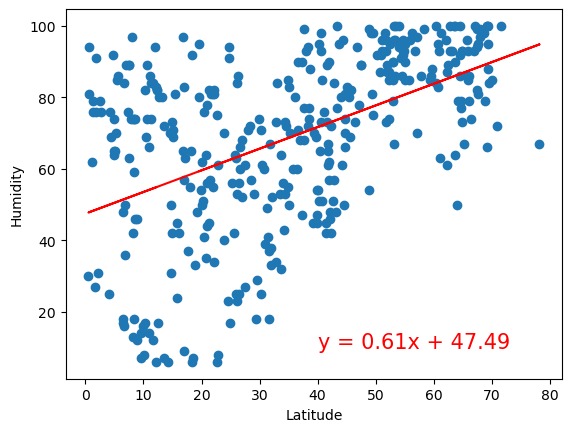

In [17]:
# Northern Hemisphere
linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],(40, 10))
plt.xlabel("Latitude")
plt.ylabel("Humidity")


The r-value between Lat and Humidity is 0.18998504340540504


Text(0, 0.5, 'Humidity')

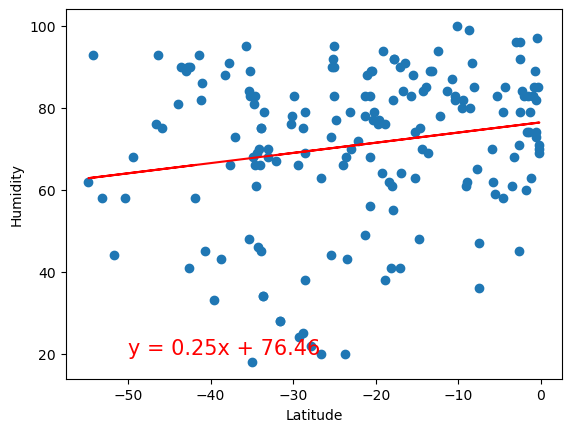

In [18]:
# Southern Hemisphere
linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],(-50,20))
plt.xlabel("Latitude")
plt.ylabel("Humidity")


**Discussion about the linear relationship:**
The nothern hemisphere the cities humidity has a low positive correlation of 0.49 which means if the latitude increases the citys humidity will increase but not alot.
In the southern hemisphere the cities humidity has a negligble correlation of 0.18 which means it is somewhat similar to the northern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value between Lat and Cloudiness is 0.30723944012961996


Text(0, 0.5, 'Cloudiness')

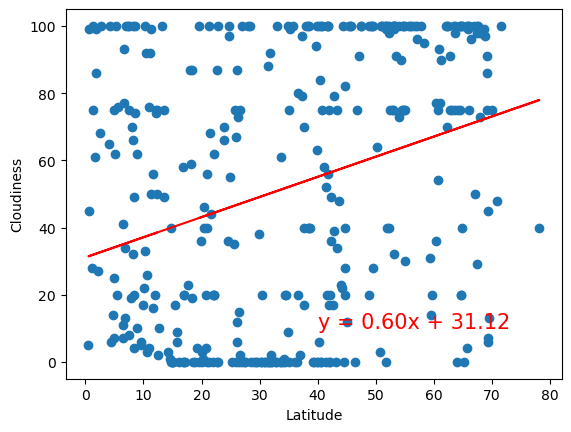

In [19]:
# Northern Hemisphere
linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],(40, 10))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

The r-value between Lat and Cloudiness is 0.2418068223726791


Text(0, 0.5, 'Cloudiness')

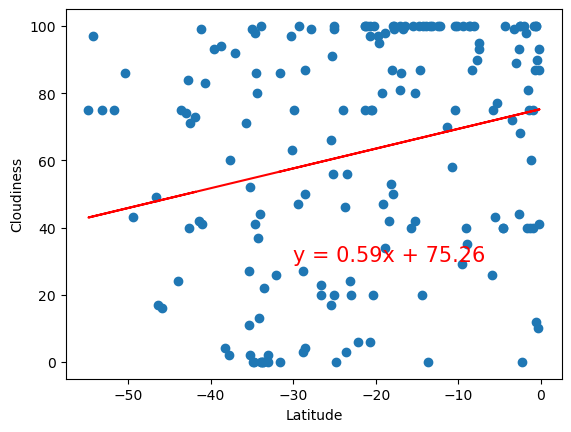

In [20]:
# Southern Hemisphere
linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],(-30,30))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


**Discussion about the linear relationship:**
In the northern and southern hemisphere the cities latitude and cloudiness have both a neglible correlation. Northern being at (0.30) and Southern being at (0.24)

### Wind Speed vs. Latitude Linear Regression Plot

The r-value between Lat and Wind Speed is -0.02513501726211293


Text(0, 0.5, 'Wind Speed')

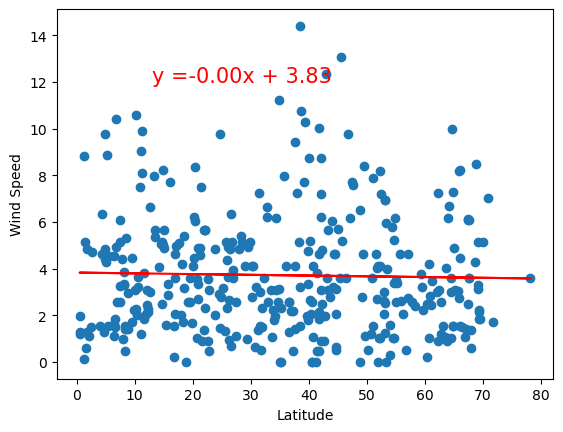

In [21]:
# Northern Hemisphere
linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],(13, 12))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

The r-value between Lat and Wind Speed is -0.09117144108330372


Text(0, 0.5, 'Wind Speed')

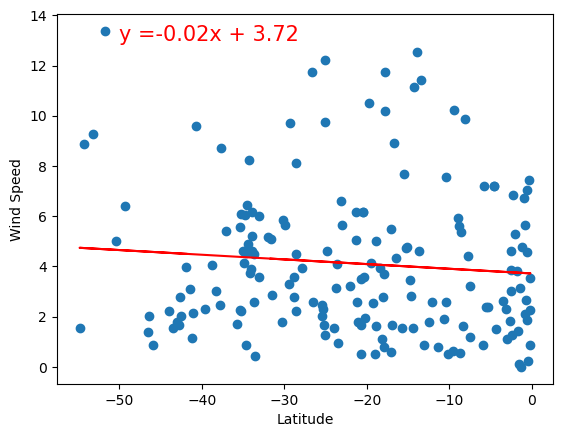

In [22]:
# Southern Hemisphere
linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],(-50,13))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

**Discussion about the linear relationship:**
In the northern and southner hemispheres you can see that a cities windspeed and latitude have almost no correlation with the Northern being at (-0.25) and Southern being at (-0.91)
This means that based on the latitude change there will not be any change in wind speeds. 